# Cvičenie prvé [AR02]

Uvažujme riadený systém v tvare
$$ 
	\begin{equation*}
		\dot{x}(t) = a\, x(t) + b \, u(t) 
	\end{equation*} 
$$
kde $x(t)$ je stavová veličina systému, $u(t)$ je akčný zásah (výstup) regulátora. Parameter $b = 1$ a parameter $a$ je neznáma konštanta.

## Úloha 1

Vyššie uvedený riadený systém je dynamický systém prvého rádu. Zodpovedajúca prenosová funkcia je $G(s) = \frac{1}{(s-a)}$. Charakteristický polymóm systému potom je v tvare $(s-a)$ a jeho koreňom je $a$. Pre $a<0$ bude systém stabilný, pre $a>0$ nestabilný a pre $a=0$ hovoríme o systéme na hranici stability. Zosilnenie systému má číselnú hodnotu $\frac{1}{a}$ a časová konštanta systému má číselnú hotnotu $\frac{1}{a}$.

Takýmto dynamickým systémom je možné opísať napríklad nabíjanie kondenzátora (elektrickým nábojom). Prípadne pri $a=0$ ide v tomto prípade o integrátor, a teda príkladom z reality je výška hladiny v nádrži bez prirodzeného odtoku.

## Úloha 2

Simulovať predmetný dynamický systém v tomto prípade znamená hľadať numerické riešenie diferenciálnej rovnice, ktorá daný systém opisuje. Pri tom je nutné využiť informáciu o $x(0)$ (začiatočný stav) a o $u(t)$ (vstupný signál).

Budeme používať ODE solver.

Preto definujme funkciu, ktorá bude pre potreby ODE solvera realizivať predmetnú diferenciálnu rovnicu. Teda:

In [15]:
def fcn_difRovnice_01(x, t, a, u):

    dotx = a*x + u

    return dotx

ODE solver potrebuje v princípe tri informácie. Funkciu, ktorú sme práve zadefinovali, začiatočný stav veličiny (veličín), ktorej časový priebeh hľadáme a časový interval alebo časové hodnoty, v ktorých chceme poznať hodnoty numerického riešenia.

Stanovme začiatočný stav signálu $x(0)$, ktorú použijeme v simulácii:

In [16]:
sim_x_0 = 1

Ďalej stanovme časový interval, pre ktorý chceme vykonať simuláciu:

In [17]:
sim_t_start = 0
sim_t_final = 5

Ďalej uvážme, že v (simulovanom) dynamickom systéme potrebujeme poznať aj hodnoty parametra $a$ a signálu $u(t)$. Najednoduchšie by bolo, ak by sme tieto hodnoty stanovili ako konštanty. V prípade parametra $a$ by to bolo celkom prirodzené, že o ňom uvažujeme ako o konštante. 

In [18]:
param_a = -1

V prípade signálu $u(t)$ by ale mohlo byť nevyhovujúce ak by sme ho považovali za konštantný počas celého času simulácie. Čo ak by sme chceli simulovať rozne honoty signálu $u(t)$ v rôznom čase?

Povedzme, že by sme chceli mať možnosť zmeniť hodnotu signálu $u(t)$ každých 0,05 sekúnd (napríklad). Z istého pohľadu by sme mohli mať teda ako by „periódu vzorkovania“ z akou chceme byť schopný zmeniť napríklad signál $u(t)$. Stanovme túto kvázi periódu a vypočítajme počet potrebných „krokov“ na prejdenie celého časového intervalu  (<code>sim_finalIndex</code>)

In [19]:
sim_T_s = 0.05
sim_finalIndex = int(((sim_t_final - sim_t_start)/sim_T_s) + 1)

Vzhľadom na uvedené zadefinujme signál $u(t)$ pomocou nasledujúcej tabuľky, kde prvý stĺpec nech je čas, v ktorom signál nadobudne hodnotu uvedenú v druhom stĺpci (a ostane na tejto hodnote).

In [20]:
import numpy as np # budeme používať knžnicu NumPy

tab_sig_u = np.array([
        [0, 0],
        [3, 1],
])

Inicializujme pole (ako nulové hodnoty), ktoré bude obsahovať hodnoty samotného signálu a postupne priraďme do poľa hodnoty zodpvedajúce uvedenej tabuľke:

In [21]:
def tab_to_sig(tab, T_s, finalIndex):

    sig = np.zeros([finalIndex, 1])

    for idx in range(sig.shape[0]):
        lastValue = tab[:,1][tab[:,0]<=idx*T_s][-1]
        sig[idx] = lastValue

    return(sig)

sig_u = tab_to_sig(tab_sig_u, sim_T_s, sim_finalIndex)

print(sig_u[:,0]) # Ilustračne vyprintnime v kompaktnom tvare

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


Prislúchajúci časový vektor (k signálu $u(t)$) samozrejme je:

In [22]:
timeVector = np.arange(sim_t_start, sim_t_final + sim_T_s, sim_T_s)

print(timeVector)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15
 4.2  4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85
 4.9  4.95 5.  ]


Pre názornosť, vykreslime signál $u(t)$:

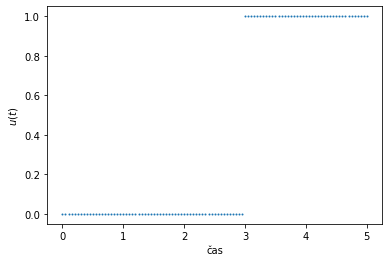

In [23]:
import matplotlib.pyplot as plt

plt.plot(timeVector, sig_u, '.', ms=2)
plt.ylabel('$u(t)$')
plt.xlabel('čas')
plt.show()

##### Volanie ODE solvera

V tomto bode môžeme pristúpiť k tomu, že použijeme ODE solver.

Avšak, ODE solver nebudeme volať pre celý časový interval naraz. Budeme ho volať/používať postupne po „krokoch“, po malých časových úsekoch, pre ktoré máme (pre každý jeden) definované hodnoty vstupného signálu $u(t)$ (a samozrejme máme všetky ostatné potrebné informácie).

ODE solver budeme volať vo for cykle, a počet cyklov bude (<code>sim_finalIndex</code>). Zostavme funkciu, ktorá to všetko zrealizuje:

In [24]:
from scipy.integrate import odeint

def fcn_simSch_00(t_start, T_s, finalIndex, x_0, param_a, sig_u):

    #-----------------------------------------
    # casovy vektor (pole), jeho inicializacia a zapisanie zaciatocnej hodnoty

    t_log = np.zeros([finalIndex, 1]) 
    t_log[0,:] = t_start

    #-----------------------------------------
    # vektor stavu dynamickeho systemu 

    x_0 = np.array([x_0]) # zac. podmienka zapisana do pola

    x_log = np.zeros([finalIndex, len(x_0)])
    x_log[0,:] = x_0

    #-----------------------------------------

    timespan = np.zeros(2)
    for idx in range(1, int(finalIndex)):

        #-------------------------------------
        # Volanie ODEsolvera na casovom rozsahu zapisanom v timespan (od-do)

        timespan[0] = t_log[idx-1,:]
        timespan[1] = t_log[idx-1,:] + T_s

        odeOut = odeint(fcn_difRovnice_01,
                        x_log[idx-1,:],
                        timespan,
                        args=(param_a, sig_u[idx-1,:])
                        )

        x_log[idx,:] = odeOut[-1,:]
        t_log[idx,:] = timespan[-1]

    return [t_log, x_log]

Zavolajme funkciu realizujúcu požadovanú simulačú schému.

In [25]:
# Simulacia
t_log, x_log, = fcn_simSch_00(
    sim_t_start,
    sim_T_s,
    sim_finalIndex,
    sim_x_0,
    param_a, 
    sig_u,
)

Vykreslime výsledok:

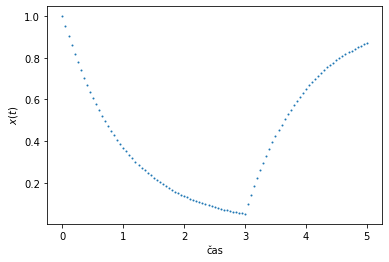

In [26]:
plt.plot(t_log, x_log, '.', ms=2)
plt.ylabel('$x(t)$')
plt.xlabel('čas')
plt.show()

Je zrejmé, že do času 3, kým je signál $u(t)$ nulový, veličina $x(t)$ klesá zo začiatočnej hodnoty do rovnovážneho stavu, a potom, od času 3, systém reaguje na nenulový vstup $u(t)$.

##### Simulácia podľa úlohy 2
V úlohe 2 sa požaduje $u(t) = 0$, tak zmeňme:

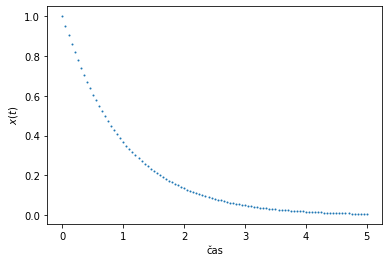

In [27]:
tab_sig_u = np.array([
        [0, 0],
])

sig_u = tab_to_sig(tab_sig_u, sim_T_s, sim_finalIndex)


t_log, x_log, = fcn_simSch_00(
    sim_t_start,
    sim_T_s,
    sim_finalIndex,
    sim_x_0,
    param_a, 
    sig_u,
)

plt.plot(t_log, x_log, '.', ms=2)
plt.ylabel('$x(t)$')
plt.xlabel('čas')
plt.show()

...čím sme vyriešili úlohu 2.